# Chess Board Detection

## Detect the bottom left corner (8h) of the chessboard

We first get the images

In [1]:
import os
import sys
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
# all files in the /datasets/chess folder

# get the current working directory
cwd = os.getcwd()

# get the list of all files in the ../../datasets/chess folder
image_paths = glob.glob(os.path.join(cwd, '../../datasets/chess/*'))

print(image_paths)

['/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.29.08.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.32.06.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.27.26.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.31.53.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.32.02.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.31.45.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screenshot 2567-12-07 at 21.27.52.png', '/Users/betich/code/work/RoboticsAI/chess-detection/src/chess_board/../../datasets/chess/Screens

Step 1 : Read the image

In [3]:
def show_cv2_image(image, title='image'):
  plt.figure()
  plt.title(title)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
def dataset_path(path):
  return os.path.join(cwd, '../../datasets', path)

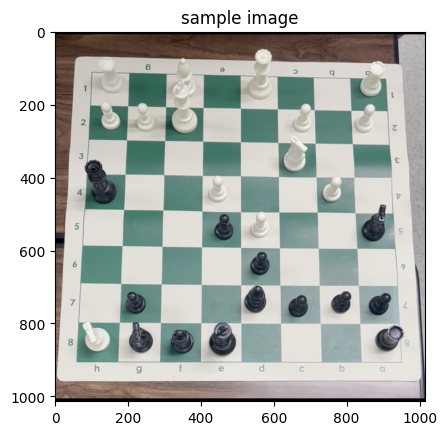

In [5]:
sample_image_path = image_paths[0]

sample_image = cv2.imread(sample_image_path)

show_cv2_image(sample_image, "sample image")

Top Left: [616.53845 396.38937]
Top Right: [618.99915 695.87067]
(True, array([[[616.53845, 396.38937]],

       [[617.37976, 493.96396]],

       [[618.27704, 593.5845 ]],

       [[618.99915, 695.87067]],

       [[512.43994, 394.40073]],

       [[512.1374 , 492.61346]],

       [[511.88376, 591.7207 ]],

       [[511.6403 , 694.543  ]],

       [[407.77048, 392.6174 ]],

       [[406.32904, 489.89496]],

       [[404.74304, 589.71027]],

       [[403.3022 , 692.75543]],

       [[302.27817, 389.9695 ]],

       [[299.34677, 486.60846]],

       [[296.56882, 587.2843 ]],

       [[293.92343, 690.84985]]], dtype=float32))


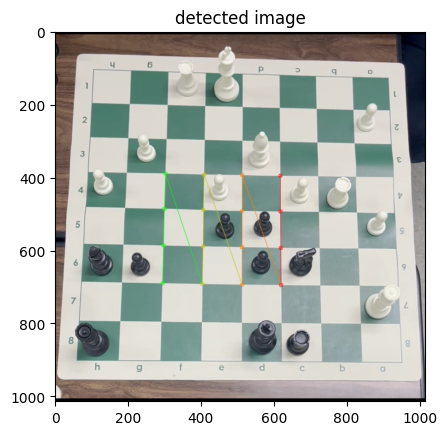

In [7]:
# find chessboard corners

def find_chessboard_corners(filein):
  image = cv2.imread(filein)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
  pattern_size = (4, 4)
  ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)
  
  if ret:
    # Refine corner locations
    corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), 
                                criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))

    # Draw and visualize corners
    cv2.drawChessboardCorners(image, pattern_size, corners, ret)

    # Identify orientation based on corner positions
    top_left = corners[0].ravel()
    top_right = corners[pattern_size[0] - 1].ravel()
    bottom_left = corners[-pattern_size[0]].ravel()
    bottom_right = corners[-1].ravel()

    # Compute angle or relative positions
    # Example: Check if the top-left is where you expect
    print("Top Left:", top_left)
    print("Top Right:", top_right)

    # If needed, rotate to correct orientation
    # Use warpAffine or other transformation method
    
    show_cv2_image(image, "detected image")
    
  return ret, corners

print(find_chessboard_corners(image_paths[1]))

# for image_path in image_paths:
#   print(f'Processing {image_path}')
#   print(find_chessboard_corners(image_path))

Step 2 : OCR the image to get the text

In [8]:
from PIL import Image
import pytesseract

In [9]:
def ocr_image(image):
  return pytesseract.image_to_string(Image.fromarray(image))

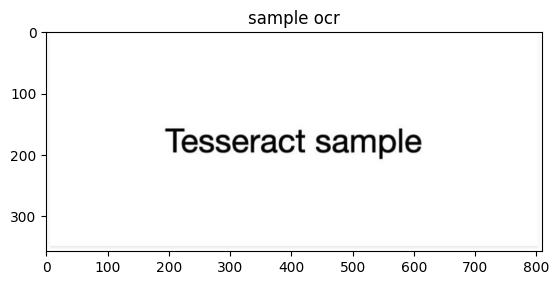

In [10]:
show_cv2_image(cv2.imread(dataset_path('image-ocr.jpg')), "sample ocr")

In [11]:
filename = dataset_path('image-ocr.jpg')

ocr_input = cv2.imread(filename)

print(f'Result: {ocr_image(ocr_input)}')

Result: Tesseract sample



In [12]:
img1 = np.array(Image.open(sample_image_path))
text = pytesseract.image_to_string(img1)

print(f'Result: {text}')

Result: 


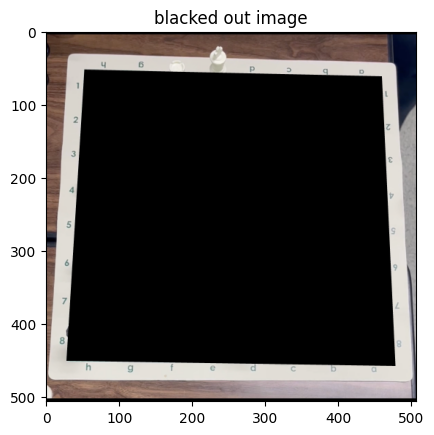

In [13]:
show_cv2_image(cv2.imread(dataset_path('chess_black.png')), "blacked out image")

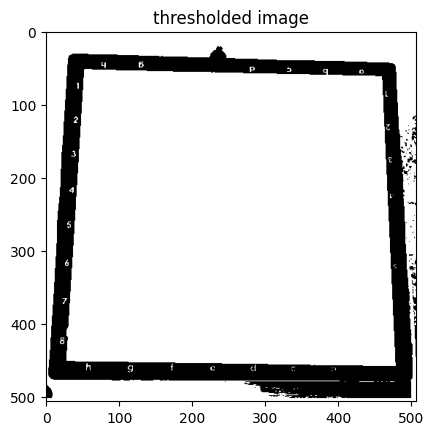

In [14]:
# boost contrast
chess_black = cv2.imread(dataset_path('chess_black.png'))

# thresholding
chess_black = cv2.imread(dataset_path('chess_black.png'), cv2.IMREAD_GRAYSCALE)

_, chess_black = cv2.threshold(chess_black, 165, 255, cv2.THRESH_BINARY_INV)

show_cv2_image(chess_black, "thresholded image")

In [15]:
result = ocr_image(chess_black)

print(f'Result: {result}')

Result: 


In [16]:

# Imports the Google Cloud client library
from google.cloud import vision


def run_quickstart() -> vision.EntityAnnotation:
    """Provides a quick start example for Cloud Vision."""

    # Instantiates a client
    client = vision.ImageAnnotatorClient()

    # The URI of the image file to annotate
    file_uri = "gs://cloud-samples-data/vision/label/wakeupcat.jpg"

    image = vision.Image()
    image.source.image_uri = file_uri

    # Performs label detection on the image file
    response = client.label_detection(image=image)
    labels = response.label_annotations

    print("Labels:")
    for label in labels:
        print(label.description)

    return labels

run_quickstart()

Labels:
Cat
Felidae
Felinae
Carnivores
Facial expression
Tooth
Snout
Whiskers
Tongue
Internet meme


[mid: "/m/01yrx"
description: "Cat"
score: 0.992053509
topicality: 0.779349387
, mid: "/m/0307l"
description: "Felidae"
score: 0.980165482
topicality: 0.0877495
, mid: "/m/07k6w8"
description: "Felinae"
score: 0.966214538
topicality: 0.0527255461
, mid: "/m/01lrl"
description: "Carnivores"
score: 0.957358122
topicality: 0.00386097678
, mid: "/m/01k74n"
description: "Facial expression"
score: 0.944949746
topicality: 0.00617450802
, mid: "/m/0cnxs6x"
description: "Tooth"
score: 0.934373319
topicality: 0.00806966517
, mid: "/m/05mqq3"
description: "Snout"
score: 0.90032959
topicality: 0.0128798028
, mid: "/m/01l7qd"
description: "Whiskers"
score: 0.860618949
topicality: 0.0510468185
, mid: "/m/0fjkt"
description: "Tongue"
score: 0.810910583
topicality: 0.00401813863
, mid: "/m/025rxrz"
description: "Internet meme"
score: 0.801999629
topicality: 0.619403064
]

In [17]:
def detect_text(path, verbose=False):
    """Detects text in the file."""
    from google.cloud import vision

    client = vision.ImageAnnotatorClient()

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    
    if verbose:
        print("Texts:")

        for text in texts:
            print(f'\n"{text.description}"')

            vertices = [
                f"({vertex.x},{vertex.y})" for vertex in text.bounding_poly.vertices
            ]

            print("bounds: {}".format(",".join(vertices)))

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
    
    return texts


In [18]:
detected_texts = detect_text(dataset_path('chess_black.png'), verbose=True)

Texts:

"1
g
h
2
3
5
9
P
7
b
C
8
h
g
L
2
3
P
5
C
6
a"
bounds: (18,42),(481,42),(481,467),(18,467)

"1"
bounds: (41,71),(47,71),(47,79),(41,79)

"g"
bounds: (134,50),(127,50),(127,42),(134,42)

"h"
bounds: (83,50),(76,50),(76,42),(83,42)

"2"
bounds: (37,117),(44,117),(44,124),(37,124)

"3"
bounds: (34,164),(41,164),(41,171),(34,171)

"5"
bounds: (28,261),(35,261),(35,269),(28,269)

"9"
bounds: (32,321),(26,321),(26,314),(32,314)

"P"
bounds: (278,48),(286,48),(286,55),(278,55)

"7"
bounds: (21,366),(29,366),(29,374),(21,374)

"b"
bounds: (387,59),(380,59),(380,52),(387,52)

"C"
bounds: (336,57),(330,57),(330,51),(336,51)

"8"
bounds: (18,420),(24,420),(24,428),(18,428)

"h"
bounds: (54,455),(62,455),(62,464),(54,464)

"g"
bounds: (111,458),(119,458),(119,467),(111,467)

"L"
bounds: (463,82),(470,82),(470,90),(463,90)

"2"
bounds: (471,125),(472,133),(467,133),(466,125)

"3"
bounds: (475,180),(469,180),(469,173),(475,173)

"P"
bounds: (287,456),(287,466),(278,466),(278,456)

"5"
bounds:

In [19]:
print(detected_texts[0].description)
print(detected_texts)

1
g
h
2
3
5
9
P
7
b
C
8
h
g
L
2
3
P
5
C
6
a
[locale: "und"
description: "1\ng\nh\n2\n3\n5\n9\nP\n7\nb\nC\n8\nh\ng\nL\n2\n3\nP\n5\nC\n6\na"
bounding_poly {
  vertices {
    x: 18
    y: 42
  }
  vertices {
    x: 481
    y: 42
  }
  vertices {
    x: 481
    y: 467
  }
  vertices {
    x: 18
    y: 467
  }
}
, description: "1"
bounding_poly {
  vertices {
    x: 41
    y: 71
  }
  vertices {
    x: 47
    y: 71
  }
  vertices {
    x: 47
    y: 79
  }
  vertices {
    x: 41
    y: 79
  }
}
, description: "g"
bounding_poly {
  vertices {
    x: 134
    y: 50
  }
  vertices {
    x: 127
    y: 50
  }
  vertices {
    x: 127
    y: 42
  }
  vertices {
    x: 134
    y: 42
  }
}
, description: "h"
bounding_poly {
  vertices {
    x: 83
    y: 50
  }
  vertices {
    x: 76
    y: 50
  }
  vertices {
    x: 76
    y: 42
  }
  vertices {
    x: 83
    y: 42
  }
}
, description: "2"
bounding_poly {
  vertices {
    x: 37
    y: 117
  }
  vertices {
    x: 44
    y: 117
  }
  vertices {
    x: 4

In [20]:
for text in detected_texts:
    print(f'\n"{text.description}"')

    vertices = [
        f"({vertex.x},{vertex.y})" for vertex in text.bounding_poly.vertices
    ]

    print("bounds: {}".format(",".join(vertices)))
  


"1
g
h
2
3
5
9
P
7
b
C
8
h
g
L
2
3
P
5
C
6
a"
bounds: (18,42),(481,42),(481,467),(18,467)

"1"
bounds: (41,71),(47,71),(47,79),(41,79)

"g"
bounds: (134,50),(127,50),(127,42),(134,42)

"h"
bounds: (83,50),(76,50),(76,42),(83,42)

"2"
bounds: (37,117),(44,117),(44,124),(37,124)

"3"
bounds: (34,164),(41,164),(41,171),(34,171)

"5"
bounds: (28,261),(35,261),(35,269),(28,269)

"9"
bounds: (32,321),(26,321),(26,314),(32,314)

"P"
bounds: (278,48),(286,48),(286,55),(278,55)

"7"
bounds: (21,366),(29,366),(29,374),(21,374)

"b"
bounds: (387,59),(380,59),(380,52),(387,52)

"C"
bounds: (336,57),(330,57),(330,51),(336,51)

"8"
bounds: (18,420),(24,420),(24,428),(18,428)

"h"
bounds: (54,455),(62,455),(62,464),(54,464)

"g"
bounds: (111,458),(119,458),(119,467),(111,467)

"L"
bounds: (463,82),(470,82),(470,90),(463,90)

"2"
bounds: (471,125),(472,133),(467,133),(466,125)

"3"
bounds: (475,180),(469,180),(469,173),(475,173)

"P"
bounds: (287,456),(287,466),(278,466),(278,456)

"5"
bounds: (479,2

In [6]:
from PIL import Image, ImageDraw

# overlay image with detected text on matplotlib

def draw_boxes(image, bound, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)
    draw.polygon(
        [
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y
        ],
        outline=color,
    )
    return image
  
  
def render_doc_text(filein):
    image = Image.open(filein)
    texts = detect_text(filein)
    
    for text in texts:
        image = draw_boxes(image, text.bounding_poly, 'red')
    
    return image

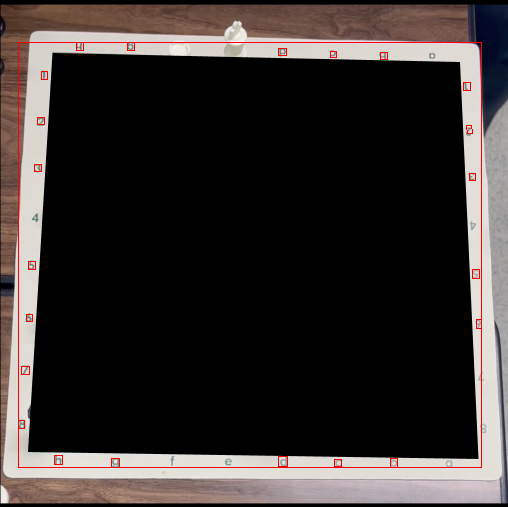

In [22]:
render_doc_text(dataset_path('chess_black.png'))

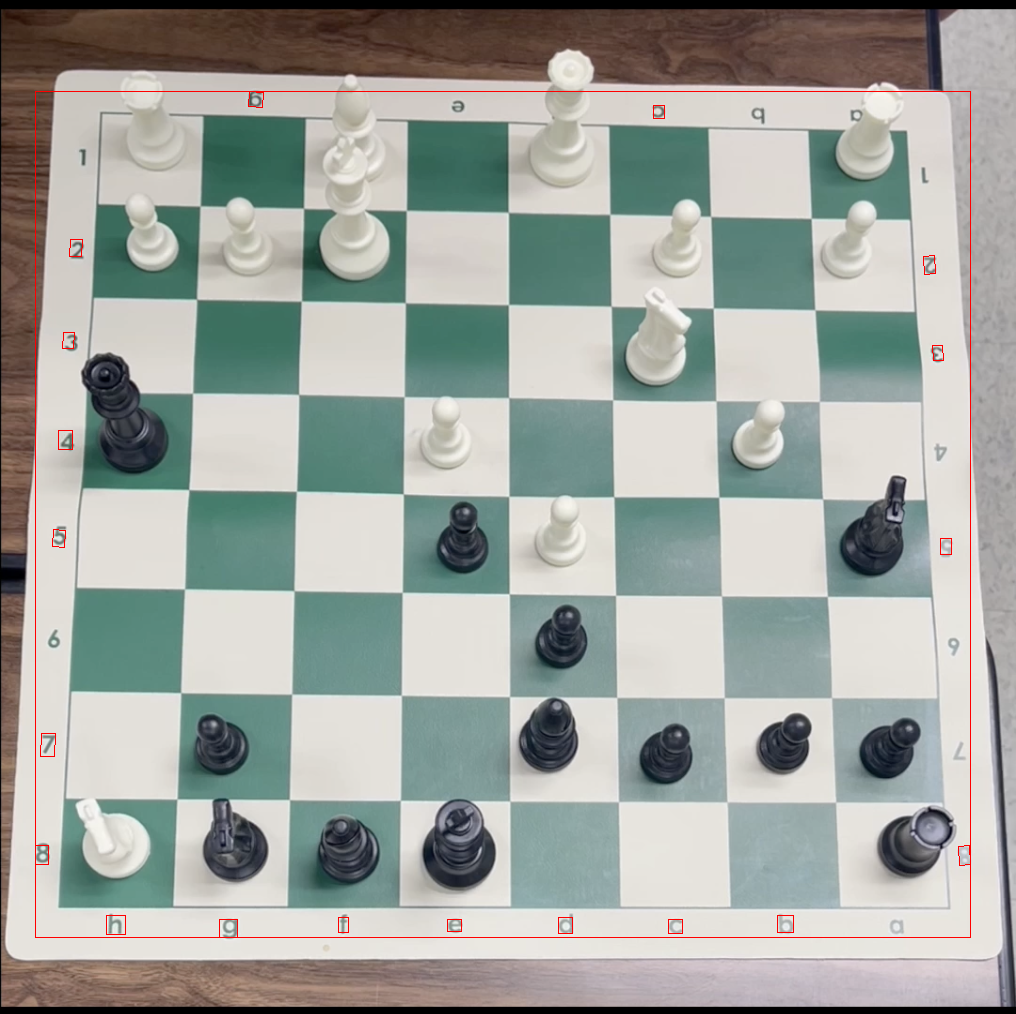

In [23]:
render_doc_text(sample_image_path)

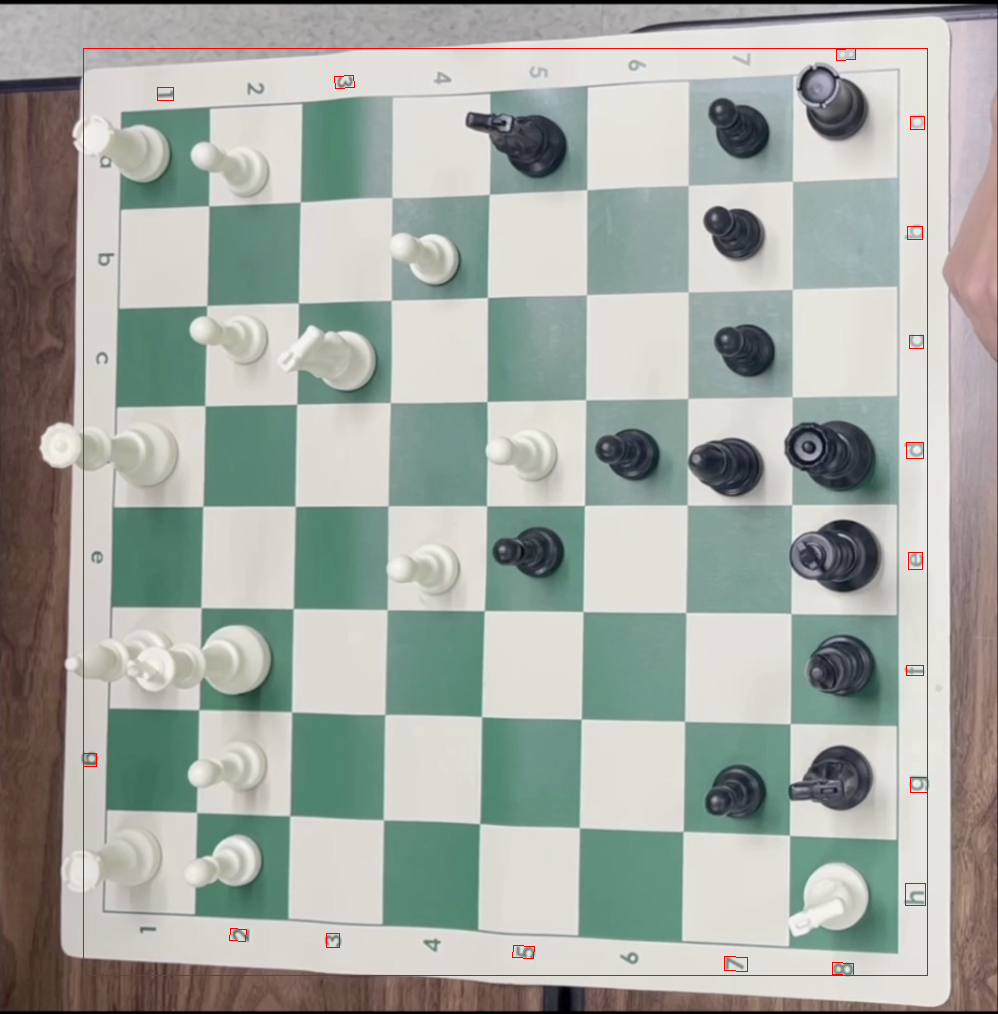

In [24]:
render_doc_text(image_paths[2])

In [25]:
def draw_cv2_boxes_gcp(image, bound, color):
  vertices = bound.vertices
  
  for i in range(len(vertices)):
    cv2.line(image, 
             (vertices[i].x, vertices[i].y), 
             (vertices[(i + 1) % len(vertices)].x, vertices[(i + 1) % len(vertices)].y),
             color, 2)
    
  return image

def draw_cv2_boxes(image, bound, color):
  bound = np.array(bound, np.int32)
  cv2.polylines(image, [bound], isClosed=True, color=color, thickness=2)
  return image

In [26]:
def bouding_poly_tuple(bound):
  return [(vertex.x, vertex.y) for vertex in bound.vertices]

In [27]:
bound = detected_texts[0].bounding_poly

print(bouding_poly_tuple(bound))

[(18, 42), (481, 42), (481, 467), (18, 467)]


In [ ]:
ORIENTATIONS = {
  'UPRIGHT': 0, # 8 is top-left, h is bottom-right: angle ~ 45 deg
  'ROTATED_RIGHT': 90, # 8 is top-right, h is bottom-left: angle ~ 135 deg
  'UPSIDE_DOWN': 180, # 8 is bottom-right, h is top-left: angle ~ 225 deg
  'ROTATED_LEFT': 270 # 8 is bottom-left, h is top-right: angle ~ 315 deg
}

def detect_chessboard_orientation(filein):
  texts = detect_text(filein)
  
  descriptions = [text.description for text in texts]
  print(f'Detected text: {descriptions}')
  
  bounds_8 = [] # sample: [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
  bounds_h = [] # sample: [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
  
  image = cv2.imread(filein)
  
  for text in texts:
    if text.description == '8':
      # image = draw_cv2_boxes(image, text.bounding_poly, (0, 255, 0))
      bounds_8.append(bouding_poly_tuple(text.bounding_poly))
    elif text.description == 'h':
      # image = draw_cv2_boxes(image, text.bounding_poly, (0, 0, 255))
      bounds_h.append(bouding_poly_tuple(text.bounding_poly))
  
  # find the closest pair of 8 and h
  closest = None
  
  for bound_8 in bounds_8:
    for bound_h in bounds_h:
      distance = np.linalg.norm(np.array(bound_8) - np.array(bound_h))
      
      if closest is None or distance < closest[0]:
        closest = (distance, bound_8, bound_h)
        
  print(f'Closest pair: {closest}')
  
  if closest is None:
    return False, closest
  
  # compute the angle between the two bounding boxes
  
  # compute the center of the two bounding boxes
  center_8 = np.mean(np.array(closest[1]), axis=0)
  center_h = np.mean(np.array(closest[2]), axis=0)
  
  # compute the angle between the two points
  angle = np.arctan2(center_h[1] - center_8[1], center_h[0] - center_8[0]) * 180 / np.pi
  
  print(f'Angle: {angle}')
  
  # draw the line between the two points
  cv2.line(image, tuple(center_8.astype(int)), tuple(center_h.astype(int)), (255, 0, 0), 2)
  
  # draw the bounding boxes
  image = draw_cv2_boxes(image, bound_8, (0, 255, 0))
  image = draw_cv2_boxes(image, bound_h, (0, 0, 255))
  
  show_cv2_image(image, "detected image")
    
  return True, closest

Detected text: ['1\ng\nh\n2\n3\n5\n9\nP\n7\nb\nC\n8\nh\ng\nL\n2\n3\nP\n5\nC\n6\na', '1', 'g', 'h', '2', '3', '5', '9', 'P', '7', 'b', 'C', '8', 'h', 'g', 'L', '2', '3', 'P', '5', 'C', '6', 'a']
Closest pair: (np.float64(102.57680049601859), [(18, 420), (24, 420), (24, 428), (18, 428)], [(54, 455), (62, 455), (62, 464), (54, 464)])
Angle: 43.814739181377604


(True,
 (np.float64(102.57680049601859),
  [(18, 420), (24, 420), (24, 428), (18, 428)],
  [(54, 455), (62, 455), (62, 464), (54, 464)]))

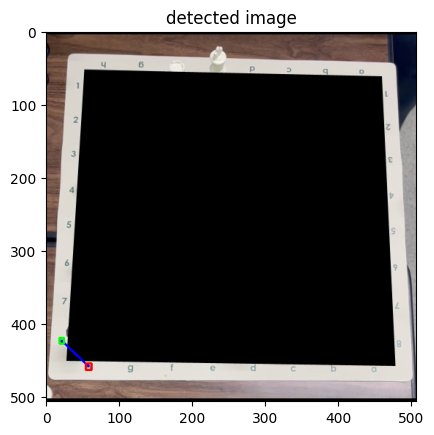

In [29]:
detect_chessboard_orientation(dataset_path('chess_black.png'))

Detected text: ['6\n2\n3\n4\nC\n5\n7\n2\n8\n8\n3\n5\nh\ng\nf\ne\nd\nC\nb', '6', '2', '3', '4', 'C', '5', '7', '2', '8', '8', '3', '5', 'h', 'g', 'f', 'e', 'd', 'C', 'b']
Closest pair: (np.float64(206.7752402972851), [(35, 864), (35, 845), (48, 845), (48, 864)], [(106, 915), (125, 915), (125, 934), (106, 934)])
Angle: 43.40885972880541


(True,
 (np.float64(206.7752402972851),
  [(35, 864), (35, 845), (48, 845), (48, 864)],
  [(106, 915), (125, 915), (125, 934), (106, 934)]))

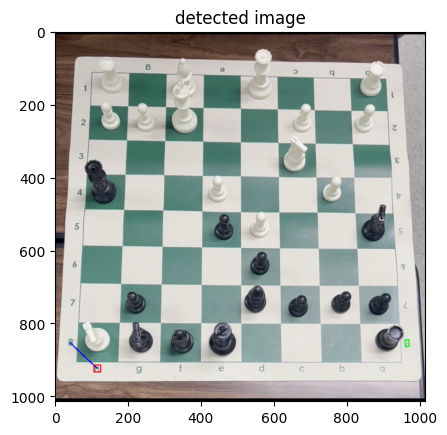

In [30]:
detect_chessboard_orientation(image_paths[0])

In [31]:
detect_chessboard_orientation(image_paths[2])

Detected text: ['6\n2\n3\n5\nL\n7\n8\n4\n3\ng\nf\ne\nd\nC\nb\n8\na', '6', '2', '3', '5', 'L', '7', '8', '4', '3', 'g', 'f', 'e', 'd', 'C', 'b', '8', 'a']
Closest pair: None


(False, None)

Detected text: ['6\n2\n3\n5\nL\n7\n8\n4\n8\ng\nf\ne\nd\nC\nb\na', '6', '2', '3', '5', 'L', '7', '8', '4', '8', 'g', 'f', 'e', 'd', 'C', 'b', 'a']
Closest pair: None
Detected text: ['6\n2\n3\nФ\n4\n5\n7\n8\nh\n3\ng\ne\nd\nC\nb\nа', '6', '2', '3', 'Ф', '4', '5', '7', '8', 'h', '3', 'g', 'e', 'd', 'C', 'b', 'а']
Closest pair: (np.float64(206.42189806316577), [(51, 832), (51, 853), (39, 853), (39, 832)], [(108, 907), (124, 907), (124, 924), (108, 924)])
Angle: 45.79572355273928
Detected text: ['и\ne\n3\n4\n2\nP\nГ\nd\n8\nn\n3\nb\nC\nd\n8', 'и', 'e', '3', '4', '2', 'P', 'Г', 'd', '8', 'n', '3', 'b', 'C', 'd', '8']
Closest pair: None
Detected text: ['8\nD\nd\n2\nC\n3\nP\nC\na\ne\n8\n1\n4\nP\n3\nn', '8', 'D', 'd', '2', 'C', '3', 'P', 'C', 'a', 'e', '8', '1', '4', 'P', '3', 'n']
Closest pair: None


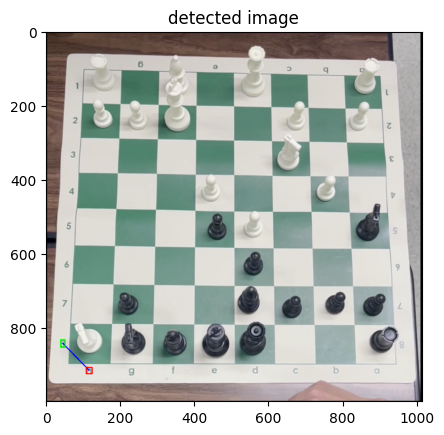

In [32]:
image = cv2.imread(image_paths[2])

images = [image]
# rotate
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
images.append(image)

# flip
image = cv2.flip(image, 1)
images.append(image)

# rotate
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

images.append(image)

# detect text in the rotated image
for i, image in enumerate(images):
  cv2.imwrite(f'rotated_{i}.png', image)
  detect_chessboard_orientation(f'rotated_{i}.png')


Detected text: ['6\n2\n3\n4\nC\n9\n8\n5\n2\n3\n5\n8\nh\ng\ne\nd\nC\nb', '6', '2', '3', '4', 'C', '9', '8', '5', '2', '3', '5', '8', 'h', 'g', 'e', 'd', 'C', 'b']
Closest pair: (np.float64(205.97087172704786), [(35, 864), (35, 845), (48, 845), (48, 864)], [(106, 915), (124, 915), (124, 934), (106, 934)])
Angle: 43.60281897270362
Detected text: ['6\n2\n3\n5\nCR\n2\n3\nง\n8\nh\ng\nf\ne\nd\nC\nb\na', '6', '2', '3', '5', 'CR', '2', '3', 'ง', '8', 'h', 'g', 'f', 'e', 'd', 'C', 'b', 'a']
Closest pair: (np.float64(206.10676844781202), [(150, 36), (171, 37), (171, 50), (150, 49)], [(98, 105), (98, 124), (79, 124), (79, 105)])
Angle: 135.19963605452438
Detected text: ['и\ne\n2\nP\n8\n2\nPJ\na\nn\nt\n3\nG\n4\nb\nC\np\na\n8', 'и', 'e', '2', 'P', '8', '2', 'PJ', 'a', 'n', 't', '3', 'G', '4', 'b', 'C', 'p', 'a', '8']
Closest pair: None
Detected text: ['n\n3\na\nC\n4\n8\nS\n3\n2\nP\nD\nd\nC\nb\n9\n2', 'n', '3', 'a', 'C', '4', '8', 'S', '3', '2', 'P', 'D', 'd', 'C', 'b', '9', '2']
Closest pair: None


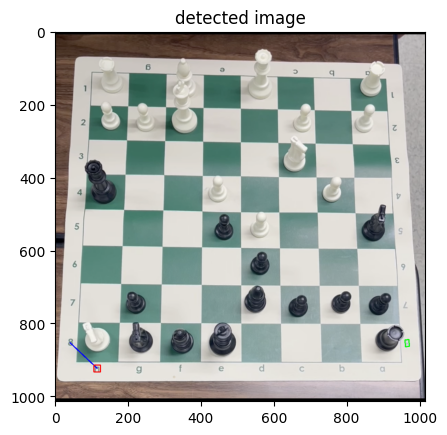

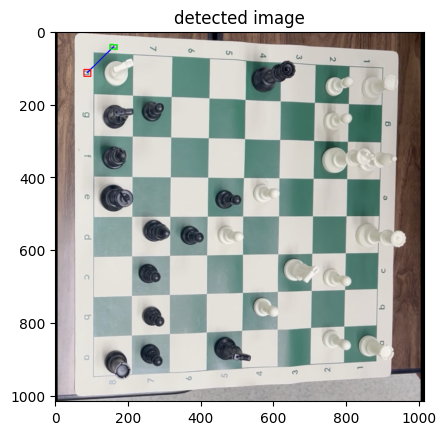

In [33]:
image = cv2.imread(image_paths[0])

images = [image]
# rotate
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
images.append(image)

# flip
image = cv2.flip(image, 1)
images.append(image)

# rotate
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

images.append(image)

# detect text in the rotated image
for i, image in enumerate(images):
  cv2.imwrite(f'rotated_{i}.png', image)
  detect_chessboard_orientation(f'rotated_{i}.png')

Detect without using cloud vision API so I don't go broke

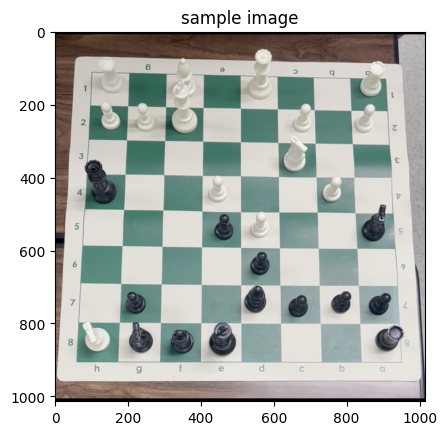

In [34]:
show_cv2_image(cv2.imread(sample_image_path), "sample image")

In [7]:
# use pytesseract to detect text in the image
import pytesseract
from pytesseract import Output

def ocr_image(image):
  d = pytesseract.image_to_data(image, output_type=Output.DICT)
  
  n_boxes = len(d['text'])
  for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  show_cv2_image(image, "detected image")
  print(d['text'])
  
  return d
  
def ocr_only_letters(image):
  d = pytesseract.image_to_data(image, output_type=Output.DICT, config=("-c tessedit"
                  "_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
                  " --psm 6"
                  " -l osd"
                  " "))
  
  n_boxes = len(d['text'])
  for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  show_cv2_image(image, "detected image")
  print(d['text'])
  
  return d

['', '', '', '', '8', '', 'h']


{'level': [1, 2, 3, 4, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 0, 1],
 'left': [0, 166, 166, 166, 166, 547, 547],
 'top': [0, 256, 256, 256, 256, 569, 569],
 'width': [1016, 511, 511, 145, 145, 130, 130],
 'height': [1014, 499, 499, 192, 192, 186, 186],
 'conf': [-1, -1, -1, -1, 81, -1, 90],
 'text': ['', '', '', '', '8', '', 'h']}

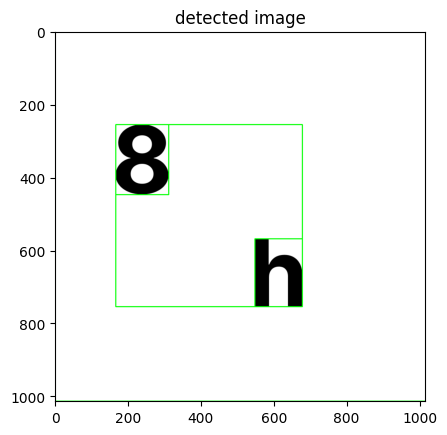

In [8]:
ocr_only_letters(cv2.imread(dataset_path('crop_reproduced.png')))

['', '', '', '', '8', '', 'h']


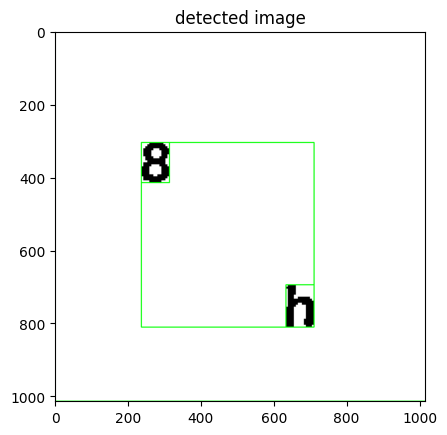

In [77]:
ocr_only_letters(cv2.imread(dataset_path('crop_scaled.png')))

['', '', '', '', 'Tesseract', 'sample']


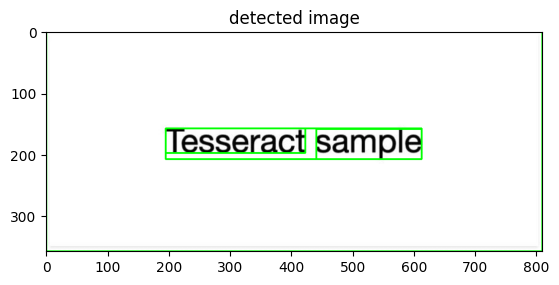

In [61]:
ocr_image(cv2.imread(dataset_path('image-ocr.jpg')))

['', '', '', '', 'shit']


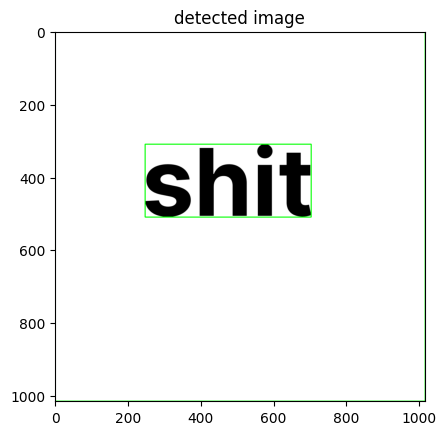

In [66]:
ocr_image(cv2.imread(dataset_path('shit.png')))

In [ ]:
ocr_only_letters(cv2.imread(dataset_path('crop_scaled.png')))

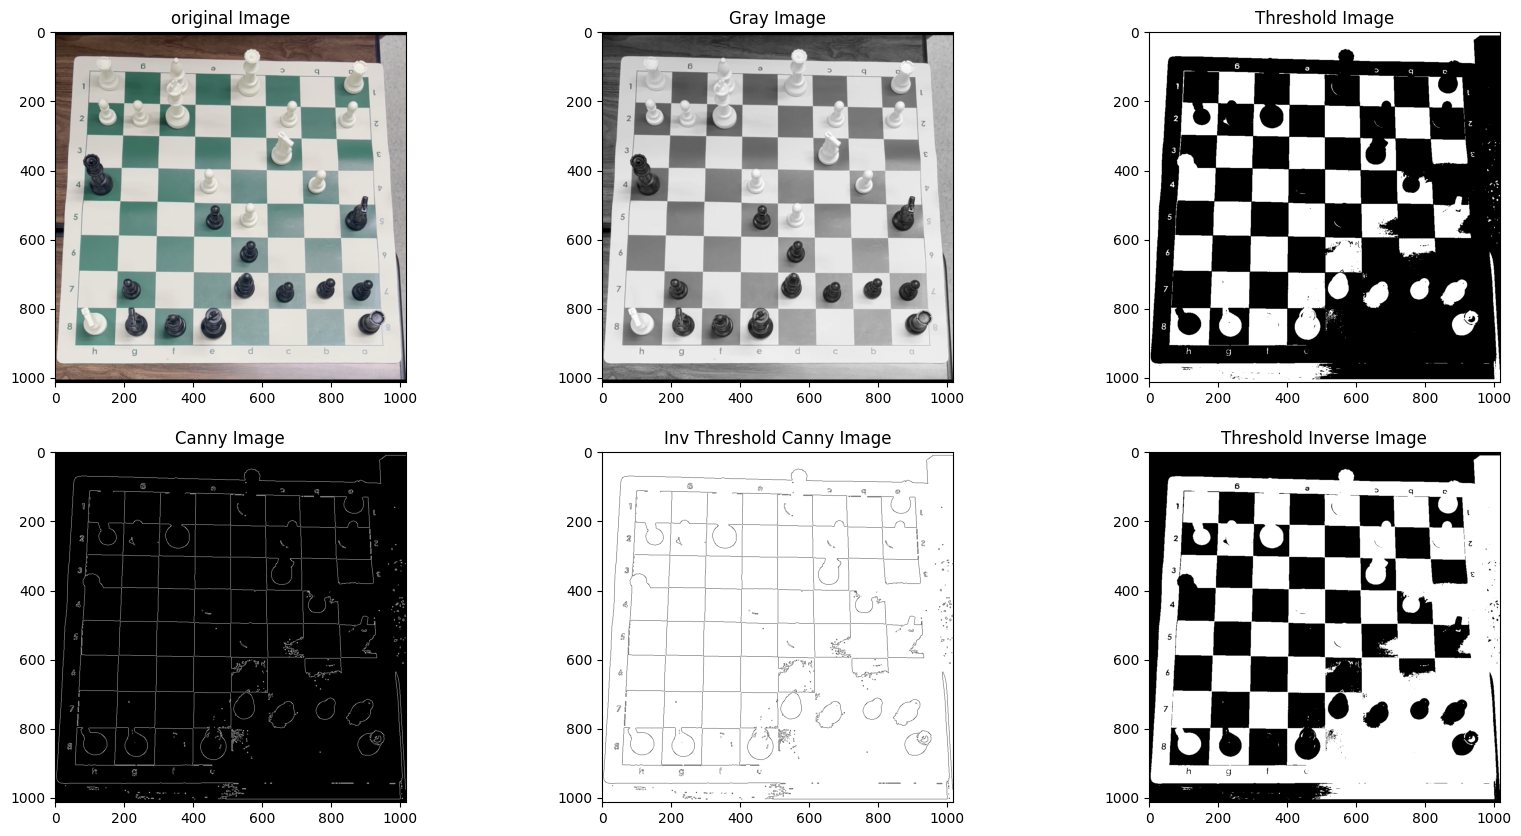

In [37]:
original_image = cv2.imread(sample_image_path)

gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
thresh_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
canny_image = cv2.Canny(thresh_image, 50, 150)

inv_thresh = cv2.bitwise_not(canny_image)

# enhance the image
thresh_inv = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


# 3-col 2-row matplotlib image

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('original Image')

ax[0, 1].imshow(gray_image, cmap='gray')
ax[0, 1].set_title('Gray Image')

ax[0, 2].imshow(thresh_image, cmap='gray')
ax[0, 2].set_title('Threshold Image')

ax[1, 0].imshow(canny_image, cmap='gray')
ax[1, 0].set_title('Canny Image')

ax[1, 1].imshow(inv_thresh, cmap='gray')
ax[1, 1].set_title('Inv Threshold Canny Image')

ax[1, 2].imshow(thresh_inv, cmap='gray')
ax[1, 2].set_title('Threshold Inverse Image')

plt.show()

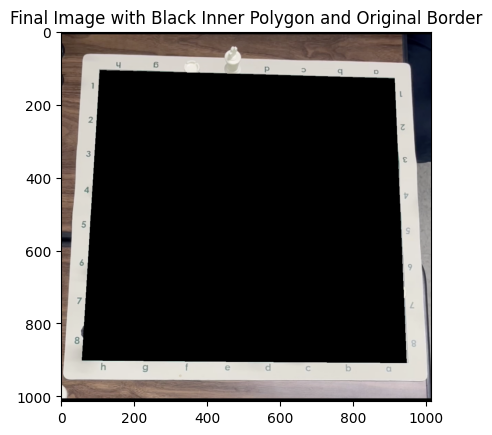

In [18]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(dataset_path('sample_chess.png'))  # Replace with your image path

def process_image(image):
  # Convert the image to HSV color space
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # Define the range of green color in HSV
  lower_green = np.array([40, 25, 40])   # Lower bound of green in HSV
  upper_green = np.array([100, 200, 200]) # Upper bound of green in HSV

  # Threshold the image to get only the green color
  mask = cv2.inRange(hsv, lower_green, upper_green)

  # Find contours
  contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a black canvas to draw contours
  contour_image = np.zeros_like(mask)

  # Draw the contours on the black canvas (255 for white contours)
  cv2.drawContours(contour_image, contours, -1, (255), 1)

  # Apply the Canny edge detector on the contour image
  edges = cv2.Canny(contour_image, 50, 150, apertureSize=3)

  # Apply Hough Line Transform to find lines in the edge-detected image
  lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

  # Separate the lines into vertical and horizontal based on their angle (theta)
  vertical_lines = []
  horizontal_lines = []

  # Find vertical and horizontal lines
  if lines is not None:
    for rho, theta in lines[:, 0]:
      # Identify vertical lines (theta near 0 or 180 degrees)
      if np.abs(theta) < np.pi / 180 * 10 or np.abs(theta - np.pi) < np.pi / 180 * 10:
        vertical_lines.append((rho, theta))
      # Identify horizontal lines (theta near 90 degrees)
      elif np.abs(theta - np.pi / 2) < np.pi / 180 * 10:
        horizontal_lines.append((rho, theta))

  # Create an empty list to store intersection points
  intersection_points = []

  # Function to compute the intersection of two lines
  def compute_intersection(line1, line2):
    rho1, theta1 = line1
    rho2, theta2 = line2

    # Calculate the intersection of two lines
    A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
    b = np.array([rho1, rho2])

    # Solve the linear system to find the intersection point
    intersection = np.linalg.solve(A, b)
    return int(intersection[0]), int(intersection[1])

  # Find intersection points between vertical and horizontal lines
  for v_line in vertical_lines:
    for h_line in horizontal_lines:
      intersection = compute_intersection(v_line, h_line)
      intersection_points.append(intersection)

  # Create an empty image to draw the intersection points
  intersection_image = np.zeros_like(image)

  # Draw the intersection points on the image (red points)
  for point in intersection_points:
    cv2.circle(intersection_image, point, 10, (0, 0, 255), -1)  # Red circle at intersection points

  # Convert the intersection image to grayscale
  grayscale_image = cv2.cvtColor(intersection_image, cv2.COLOR_BGR2GRAY)

  # Find contours of the red intersection points (non-zero pixels)
  contours, _ = cv2.findContours(grayscale_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create an empty black image to draw the center points
  center_image = np.copy(image)

  # List to store the center points' coordinates
  center_points = []

  # Iterate over each contour and find the centroid (center point)
  for contour in contours:
    # Calculate the moments of the contour
    moments = cv2.moments(contour)
    
    # Calculate the centroid (center) of the contour
    if moments['m00'] != 0:
      cx = int(moments['m10'] / moments['m00'])
      cy = int(moments['m01'] / moments['m00'])
      
      # Draw the center point (blue) on the original image
      cv2.circle(center_image, (cx, cy), 5, (255, 0, 0), -1)  # Blue circle at center
      
      # Store the center coordinates in the list
      center_points.append((cx, cy))
  center_points = sorted(center_points, key=lambda x: sum(x))

  # Step 1: Find the convex hull of the center points
  center_points_np = np.array(center_points, dtype=np.int32)  # Convert to NumPy array
  hull = cv2.convexHull(center_points_np)  # Compute convex hull

  # Step 2: Create a mask for the filled polygon
  mask = np.zeros_like(image, dtype=np.uint8)  # Create a ~~black~~ white mask with the same dimensions as the image
  cv2.fillPoly(mask, [hull], (255, 255, 255))  # Draw the filled polygon on the mask

  # Step 3: Invert the mask to isolate the region outside the polygon
  inverted_mask = cv2.bitwise_not(mask)  # Invert the mask (white becomes black and vice versa)

  # Step 4: Apply the inverted mask to the original image
  result_image = cv2.bitwise_and(image, inverted_mask)  # Keep the border as in the original image

  return result_image

# Call the function
result_image = process_image(image)

# Step 5: Display the final result
show_cv2_image(result_image, "Final Image with Black Inner Polygon and Original Border")

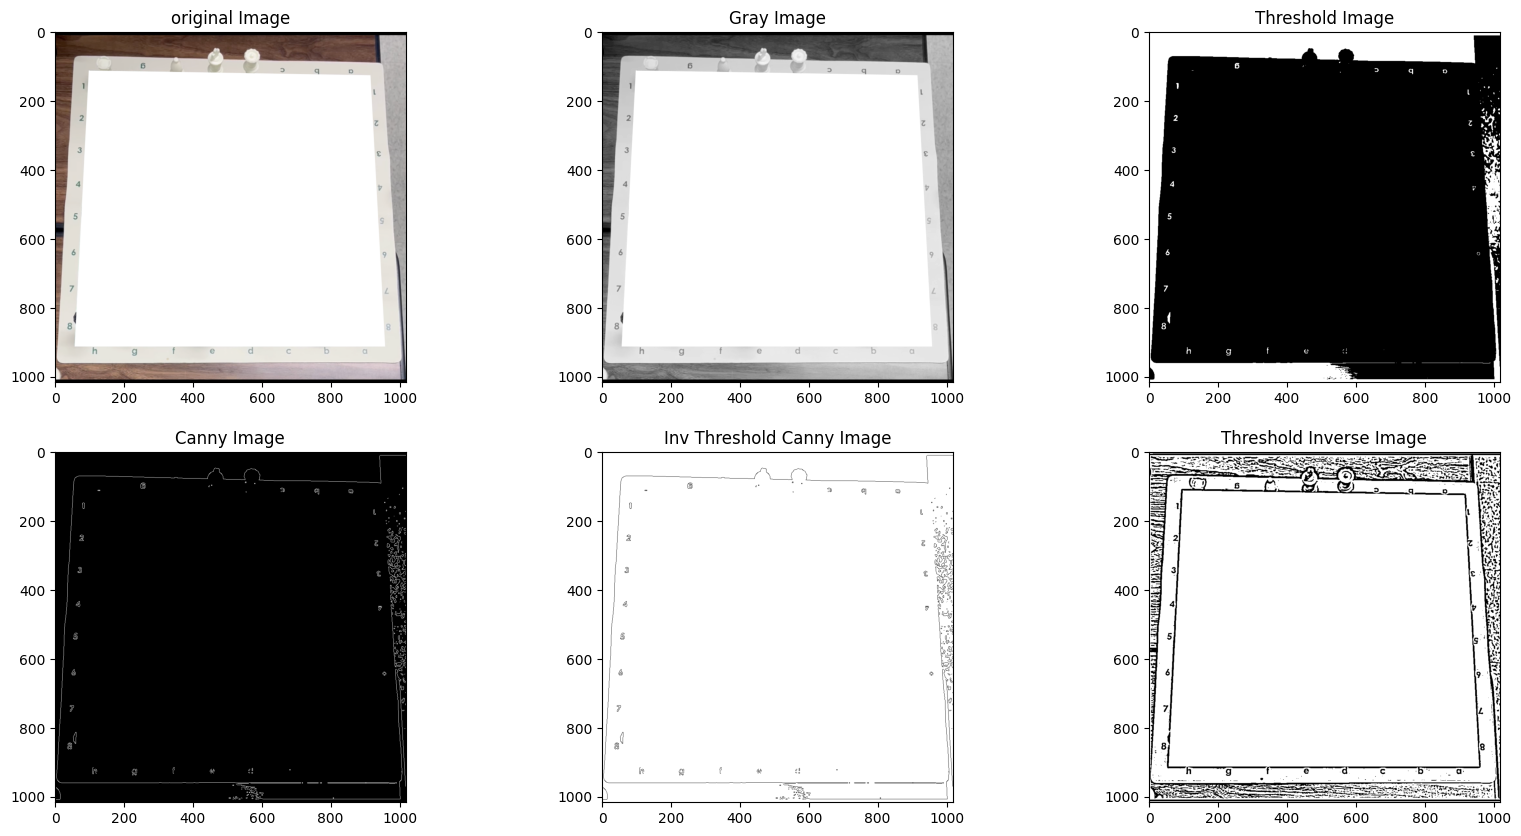

In [39]:
original_image = cv2.imread(dataset_path('white_overlay.png'))

# original_image = cv2.imread(dataset_path('sample_chess.png'))
# original_image = process_image(original_image)

gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
thresh_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
canny_image = cv2.Canny(thresh_image, 50, 150)

inv_thresh = cv2.bitwise_not(canny_image)

# adpative thresh
thresh_inv = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)


# 3-col 2-row matplotlib image

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title('original Image')

ax[0, 1].imshow(gray_image, cmap='gray')
ax[0, 1].set_title('Gray Image')

ax[0, 2].imshow(thresh_image, cmap='gray')
ax[0, 2].set_title('Threshold Image')

ax[1, 0].imshow(canny_image, cmap='gray')
ax[1, 0].set_title('Canny Image')

ax[1, 1].imshow(inv_thresh, cmap='gray')
ax[1, 1].set_title('Inv Threshold Canny Image')

ax[1, 2].imshow(thresh_inv, cmap='gray')
ax[1, 2].set_title('Threshold Inverse Image')

plt.show()

['', '', '', '', 'd', 'u', 'prss', 'r', 'pddp', '4', 'ag', 'g', 'mcr', 'rp', 'rs', 's', 'm', 'ulsmrsc', 'gm', '', 'r', 'er', 'r', 'r', '7', '7n', 'g', '27', 'p', 'r', 'rscisssces', 'sngigm', '', 'rms', 'd', 's', 'n', 'g', 'r', 'd', 'agrss', '', '', 'r', 's', 'ncv', 'ossgrd', '', '', 'r', 'rgm', '', 'ga', '4', 'pra', 'rs', '', 'g', 'r', 'egs', '', 'r', 'urd', '', 'pg', 'r', 'n', 'ngs', '', 'u', 'dgn', '', 'g', '4', 'e', 's', '', 's', 'ne', '', 'n', 'r', 'pnc', '', '', 'dg', '', '', 's', 'r', 'sp', '', 'm', '9', 'l', 'ss', '', 'rp', 'ns', '', 'd', 'ry', '', '', 'n', 's', '', '', 'd', '7', 't', 'c', '', 'i', '8', '2', '', 'p', 'y', '8', 'a', '', '', 's', '4', '4', '', 's', 'm', 'rgm', 'c', 'ge', 'a', 'yc', 'n', 'u', 'sun', 'n', '', '7', 'd', 't', 'mgrg', 'ad', 'od', 'p', 'g', '7', 'p', 'd', 'n', 'ra', 'g', '2', 'm', 'rn', '7', 'u', 's', 'mee', 'n']


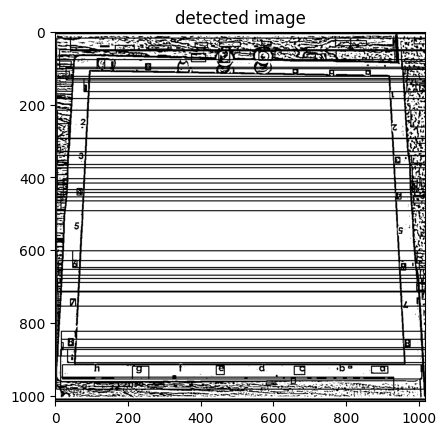

In [78]:
original_image = cv2.imread(dataset_path('chess_black.png'))

thresh_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

ocr_only_letters(thresh_image)

['', '', '', '', 'g', 'l', '', 'pr', 'ln', '', '2', '23', '', 's', 'c', '', '', '4r', 'rp', '', '', '5', 'sr', '', 'er', '9', '', '7', 'g', '', '', 'di', '', '', 'g', '', '', '78', 'e3', '', 'rttr', 'mh', '7', 'grg', 'u', 'grp', 'm', 'e', '7r', 'ssd', 'ogc', 'hp', 'u', 'd']


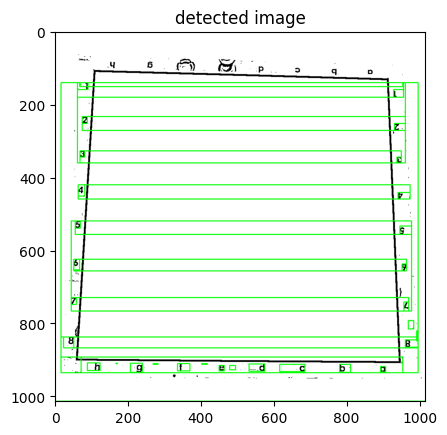

In [79]:
original_image = cv2.imread(dataset_path('sample_remove_border.png'))

ocr_only_letters(original_image)

['', '', '', '', '8', '', 'h']


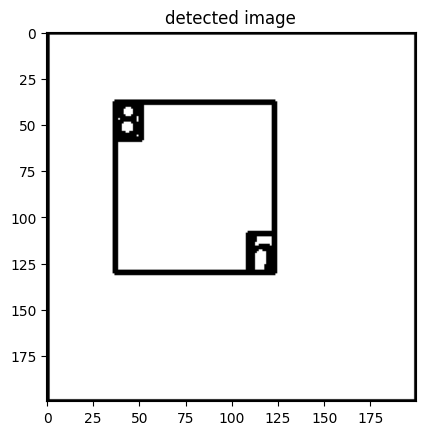

In [80]:
original_image = cv2.imread(dataset_path('only_numbers.png'))
thresh_image = cv2.adaptiveThreshold(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# slice the image

original_image = thresh_image[800:1000, 0:200]

ocr_only_letters(original_image)

In [9]:
def ocr_image(image):
  d = pytesseract.image_to_data(image, output_type=Output.DICT, config=("-c tessedit"
                  "_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
                  " --psm 6"
                  " -l osd"
                  " "))
  
  return d

In [10]:
ocr_image(cv2.imread(dataset_path('crop_scaled.png')))

{'level': [1, 2, 3, 4, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 0, 1],
 'left': [0, 236, 236, 236, 236, 632, 632],
 'top': [0, 305, 305, 305, 305, 695, 695],
 'width': [1016, 473, 473, 77, 77, 77, 77],
 'height': [1014, 506, 506, 110, 110, 116, 116],
 'conf': [-1, -1, -1, -1, 67, -1, 82],
 'text': ['', '', '', '', '8', '', 'h']}

In [11]:
def draw_box(image, x, y, w, h):
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [30]:
def show_image_with_ocr(image):
  result = ocr_image(image)
  
  if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
  

  for i in range(len(result['text'])):
    if int(result['conf'][i]) > 0:
      x = result['left'][i]
      y = result['top'][i]
      w = result['width'][i]
      h = result['height'][i]
      draw_box(image, x, y, w, h)

  show_cv2_image(image, "ocr result")

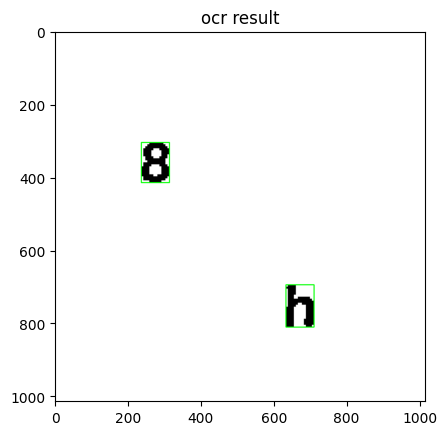

In [31]:
show_image_with_ocr(cv2.imread(dataset_path('crop_scaled.png')))

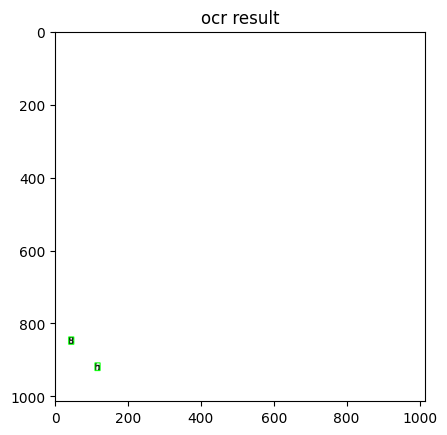

In [32]:
show_image_with_ocr(cv2.imread(dataset_path('only_numbers.png')))

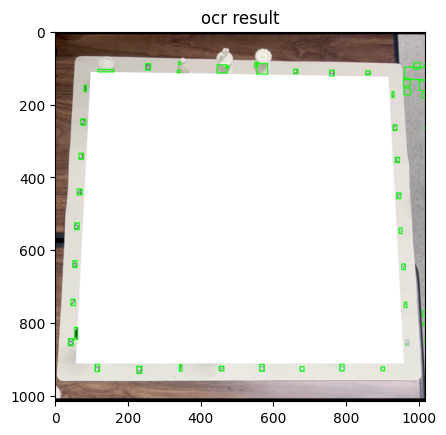

In [25]:
show_image_with_ocr(cv2.imread(dataset_path('white_overlay.png')))

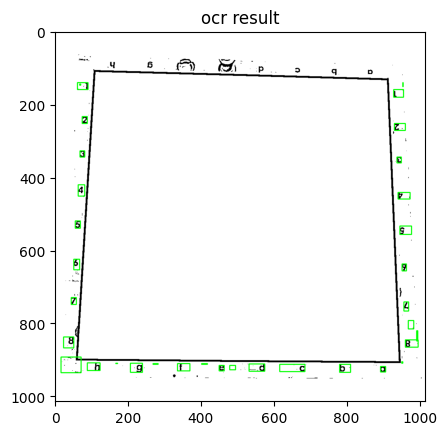

In [26]:
show_image_with_ocr(cv2.imread(dataset_path('sample_remove_border.png')))

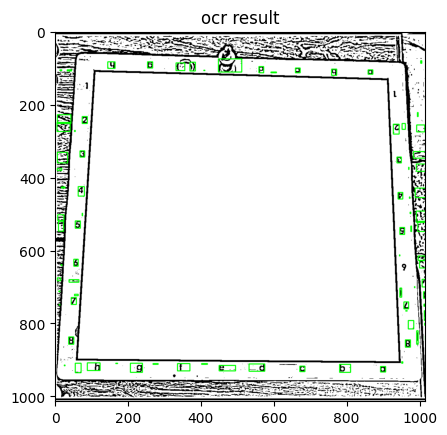

In [33]:
original_image = cv2.imread(dataset_path('sample_chess.png'))
processed_image = process_image(original_image)
thresh_inv = cv2.adaptiveThreshold(cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

show_image_with_ocr(thresh_inv)

PUT IT ALL TOGETHER